In [2]:
import sys
sys.path.append("../../src/earthtext")

import geopandas as gpd
import shapely as sh
from pyproj import CRS
epsg4326 = CRS.from_epsg(4326)
import pandas as pd
from progressbar import progressbar as pbar
import numpy as np
import matplotlib.pyplot as plt
import geoplot
import geoplot.crs as gcrs

from osm import osm


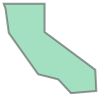

In [2]:
# load boundaries of California

cc = gpd.read_file("data/CA_State_TIGER2016.shp").to_crs(epsg4326)
c = cc.geometry[0]
c = list(c.geoms)[6].simplify(tolerance=.5)
caldf = gpd.GeoDataFrame(geometry=[c], crs=epsg4326)
c

## load query results with all OSM nodes on California

In [3]:
gg = gpd.read_parquet("data/california_osm_nature_nodes.parquet")

## show counts of tags `natural` key, clipping at 10K (`tree` has ~ 320k occurrences)

In [4]:
gcc = gg.natural.value_counts()
gcc.index = [f"{k} {v:8d}" for k,v in dict(gcc).items()]

(0.0, 10000.0)

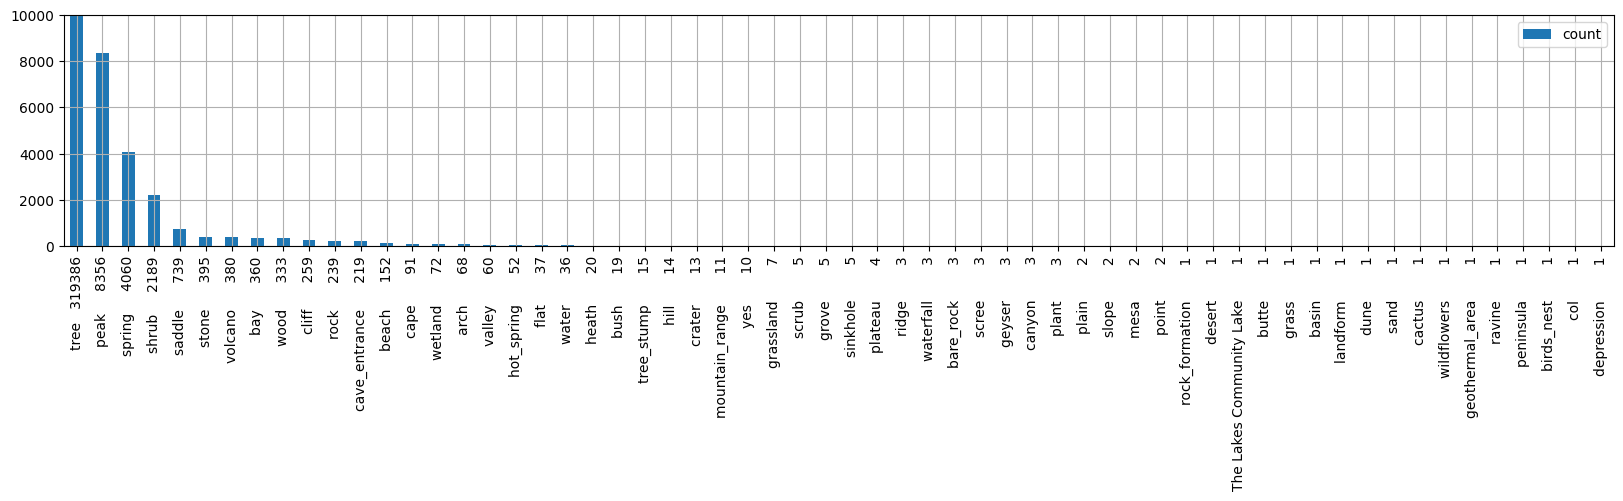

In [5]:
pd.DataFrame(gcc).plot(kind='bar', figsize=(20,3))
plt.grid()
plt.ylim(0,10000)

In [6]:
gcc = gg.natural.value_counts()


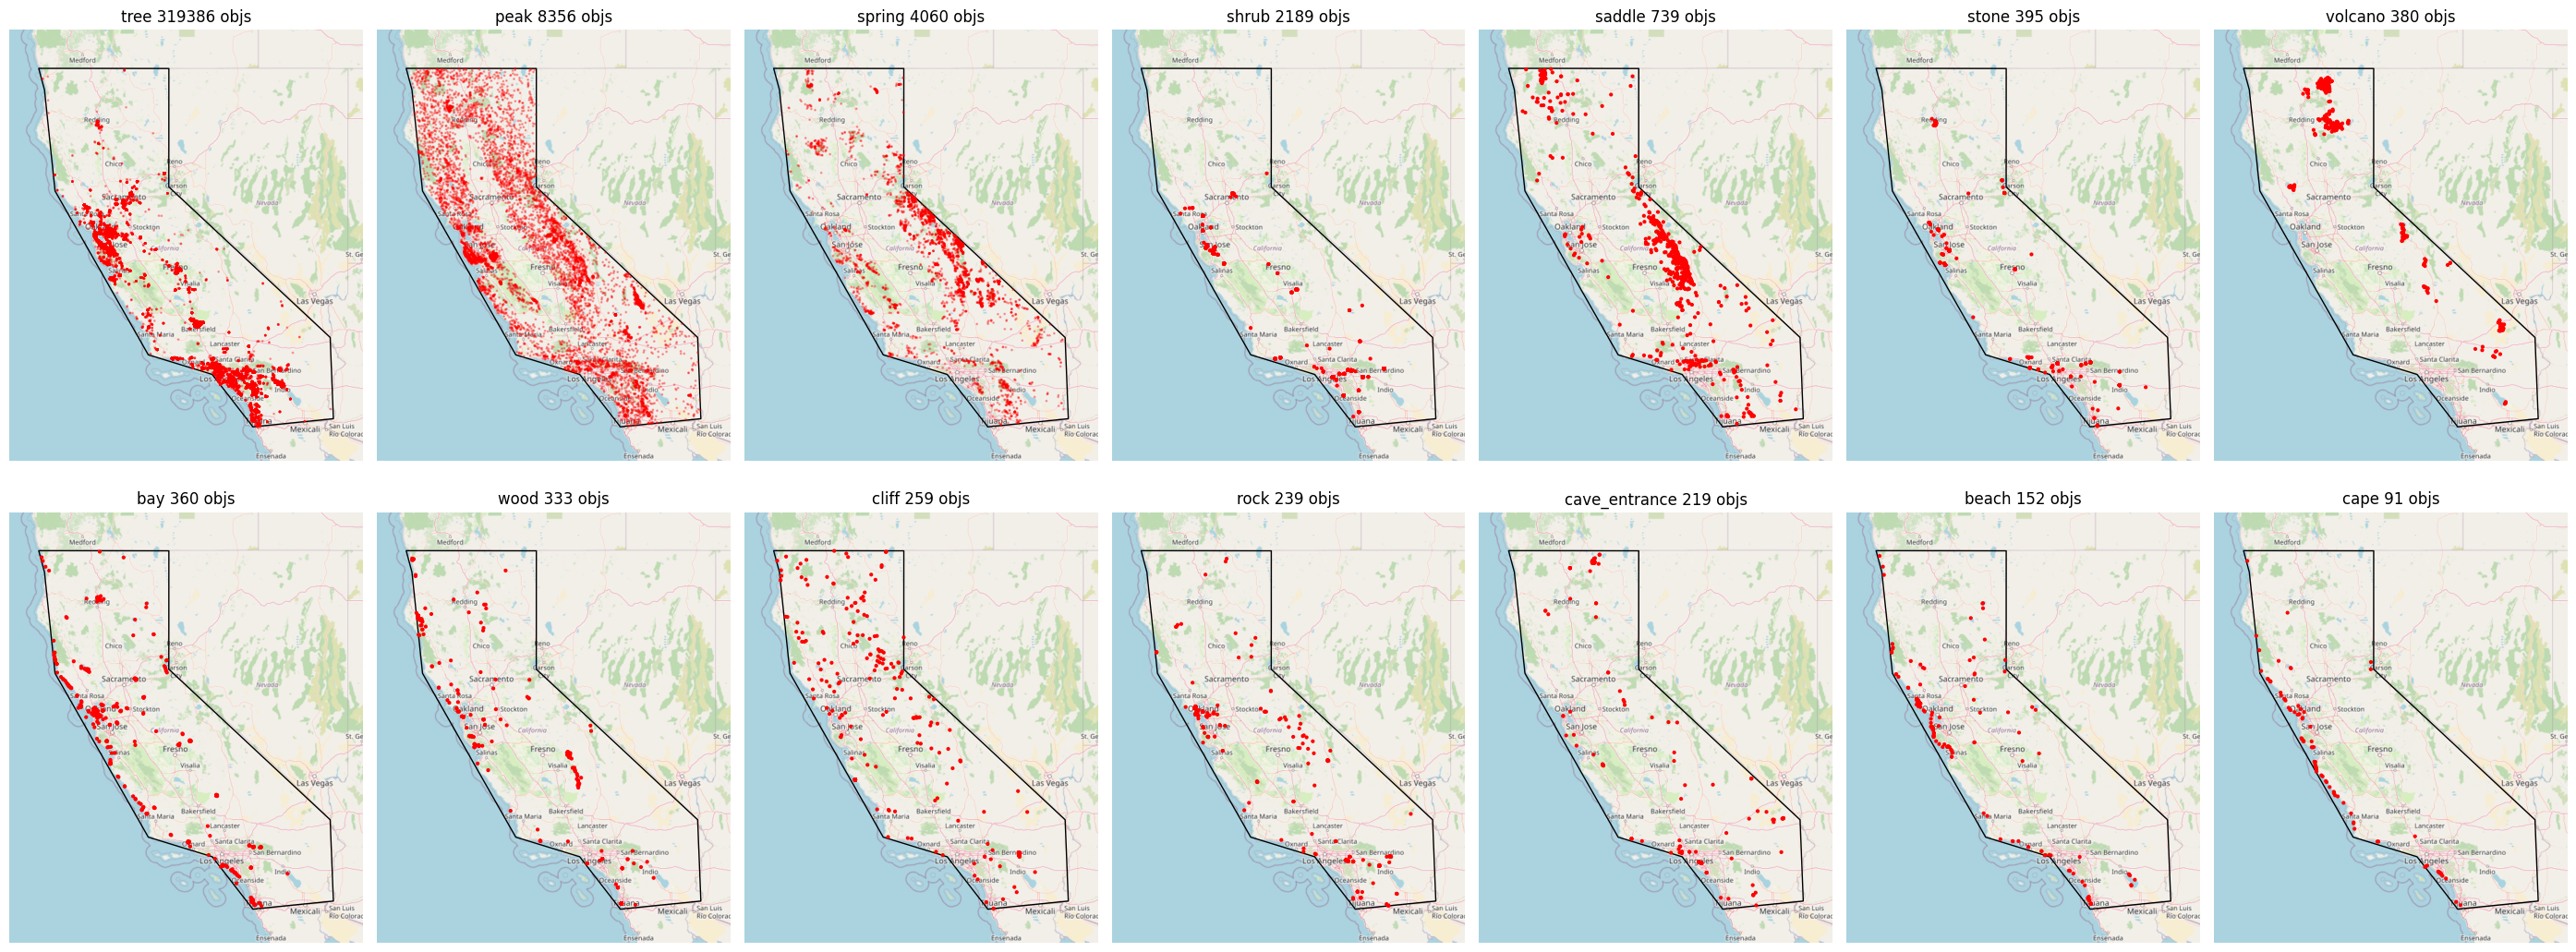

In [7]:

for ax,feature in osm.subplots(gcc.iloc[:14].index, n_cols=7, usizex=4, usizey=5.5, projection=gcrs.WebMercator()):
    x = gg[gg.natural==feature]
    lenx = len(x)
    if len(x)>50000: x=x.sample(50000)
    plt.title(f"{feature} {lenx} objs")
    geoplot.webmap(gpd.GeoDataFrame(geometry=[c], crs=epsg4326), ax=ax)
    alpha = 1 if len(x)<3000 else 0.3
    size = 2 if len(x)<3000 else 1
    geoplot.pointplot(x, ax=ax, alpha=alpha, s=size, color='red')
    geoplot.polyplot(caldf, ax=ax)


## show metadata of random nodes

In [36]:
for k in gcc.iloc[:14].index:
    x = gg[gg.natural==k].sample(1).iloc[0] 
    #x = pd.Series({k:v for k,v in dict(x).items() if v is not None and k!='geometry'})
    x = "\n".join([f"{k:20s} {v}" for k,v in dict(x).items() if v is not None and k!='geometry'])
    print (f"\n -- sample of '{k}' --\n", x)


 -- sample of 'tree' --
 natural              tree
source               http://www.bakersfieldcity.us/gis/downloads/gis_spatial_data.htm
attribution          Bakersfield_GIS

 -- sample of 'peak' --
 ele                  929
natural              peak

 -- sample of 'spring' --
 natural              spring

 -- sample of 'shrub' --
 natural              shrub

 -- sample of 'saddle' --
 ele                  3672
name                 Cirque Pass
natural              saddle
wikidata             Q118218852

 -- sample of 'stone' --
 natural              stone

 -- sample of 'volcano' --
 natural              volcano

 -- sample of 'bay' --
 name                 Swallow Bay
natural              bay

 -- sample of 'wood' --
 natural              wood

 -- sample of 'cliff' --
 name                 Ghost Town
natural              cliff
sport                climbing
fixme                position estimated

 -- sample of 'rock' --
 name                 Perched Boulder
natural              rock